#### Business Analytics, St Lawrence College (Kingston)
#### ADMN5006 - Financial Analytics Assignment
#### ML Assignment 1 - Bankruptcy practice
#### Student: Omar Mejía-Reyes
<br>
<br>

#### Installing libraries

In [15]:
!pip install jupyterthemes
!pip install imblearn

#### Invoking libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import jupyterthemes as jt
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#### Importing the dataset 

In [17]:
bankruptcy_df = pd.read_excel('C:/datasets/ba/admn5006/Bankruptcy_data.xlsx', sheet_name='Sheet1')

### 1. Exploratory Data Analysis (EDA)

<p> 
a) Confirming that the dataframe was correctly imported:
</p>

In [18]:
bankruptcy_df

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


<p>
b) Printing the full summary of the dataframe:
</p> 

In [5]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


<p>
c) Checking if the data is balanced. 
</p> 

- To acomplish this task the first step is to employ the function 'value_counts' to count the occurrences of unique values.
<br>
<br>
    0 = Banks that did not go into bankruptcy
<br>
    1 = Banks that did go into bankruptcy

In [19]:
bankruptcy_df['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

In [20]:
print("Total of banks that did NOT go into bankruptcy: " + str(format(bankruptcy_df['BK'].eq(0).sum(), ",")))
print("Total of banks that did go into bankruptcy: " + str(format(bankruptcy_df['BK'].eq(1).sum(), ",")))

Total of banks that did NOT go into bankruptcy: 92,314
Total of banks that did go into bankruptcy: 558


- From the output above, we can see that the data is imbalanced, the model may become biased towards the majority class, leading to inaccurate predictions for the minority class. 

- A graphic is used to better picture the imbalance of the data. Pie chart is used as this chart is good for visualizing proportions.

In [21]:
proportions = [bankruptcy_df['BK'].eq(0).sum(), bankruptcy_df['BK'].eq(1).sum()]
tags = ['No Bankruptcy (0)', 'Bankruptcy (1)']

figpie = go.Figure(
    data=go.Pie(labels=tags, 
    values=proportions, hole=0.5)
)

figpie.update_layout(
    title='Proportion of Bankruptcy values in the dataset',
    height=450,
    width=900,
    margin=dict(l=50, r=50, t=50, b=50),
    template='seaborn',
    legend=dict(orientation='v', y=0.3, xanchor='left', x=1.0)
)

figpie.show()

<p>
c) Analyzing the Descriptive Statistics of the dataframe for each feature:
</p>

<p>
d) Correlation matrix
</p>

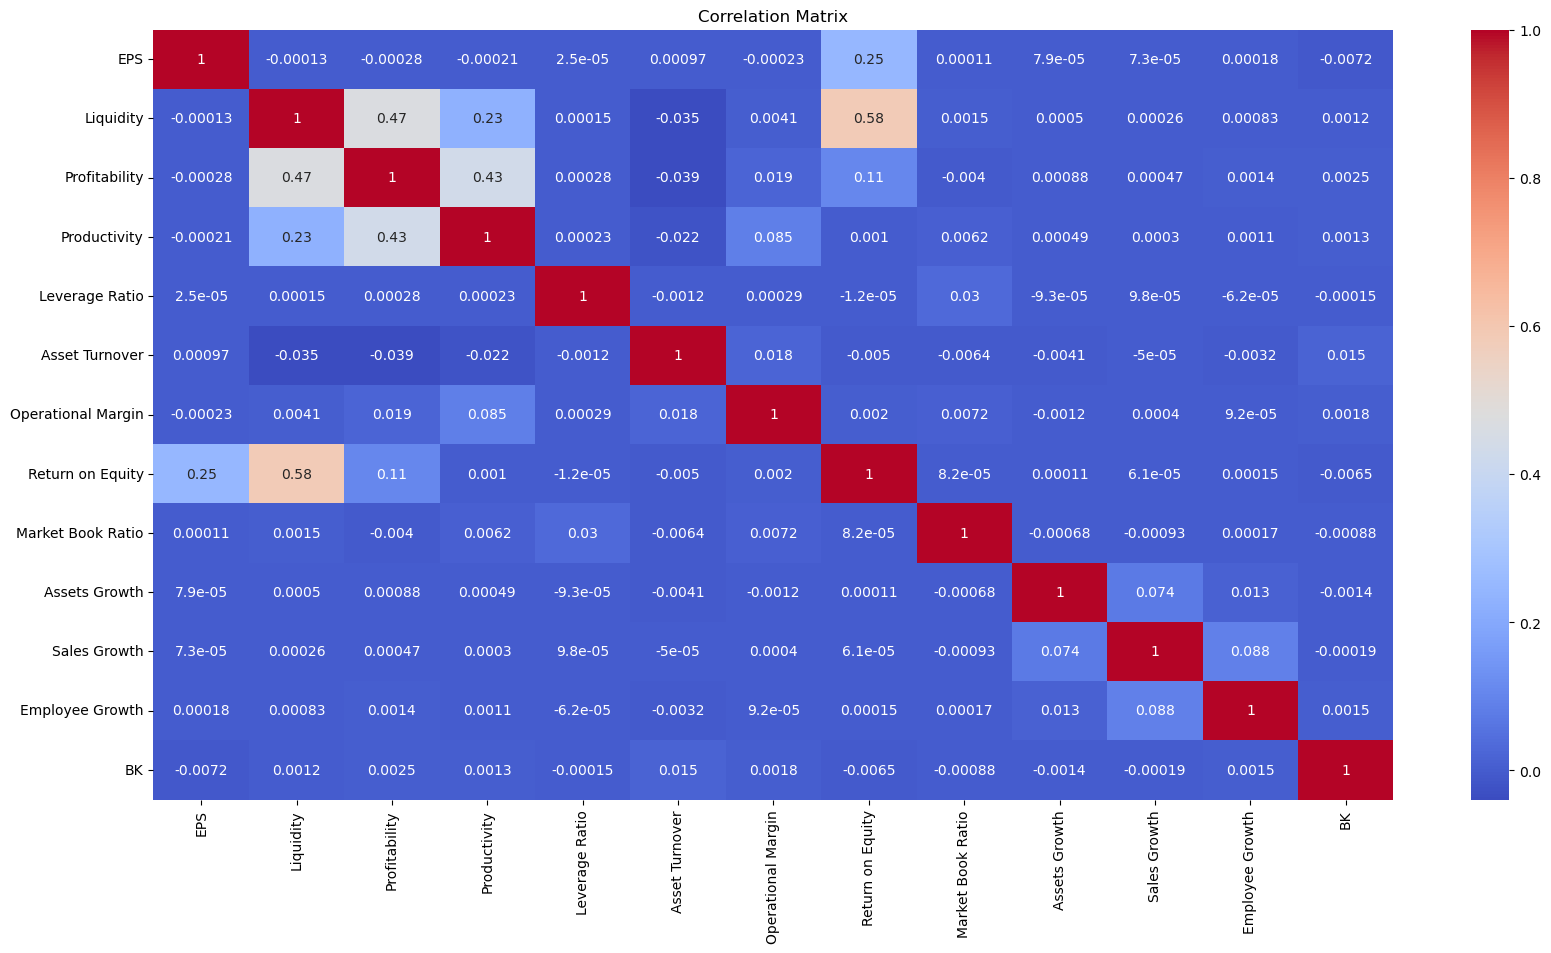

In [52]:
bankruptcy_df_CorrMatrix = bankruptcy_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(bankruptcy_df_CorrMatrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<p>
d) Are there outliers in the dataset? 
</p>

- To verify the if there are any outliners in the original dataset box-and-whisker plots will be created as these plots visually represent the distribution of the data and provide a clear indication of data points that fall far outside the typical range.

- Creating a list with the name of the features of the dataset

In [ ]:
column_names = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover',
           'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth',
           'Sales Growth', 'Employee Growth']

- Creating the box-and-whisker plots for each feature grouped by BK (0,1)

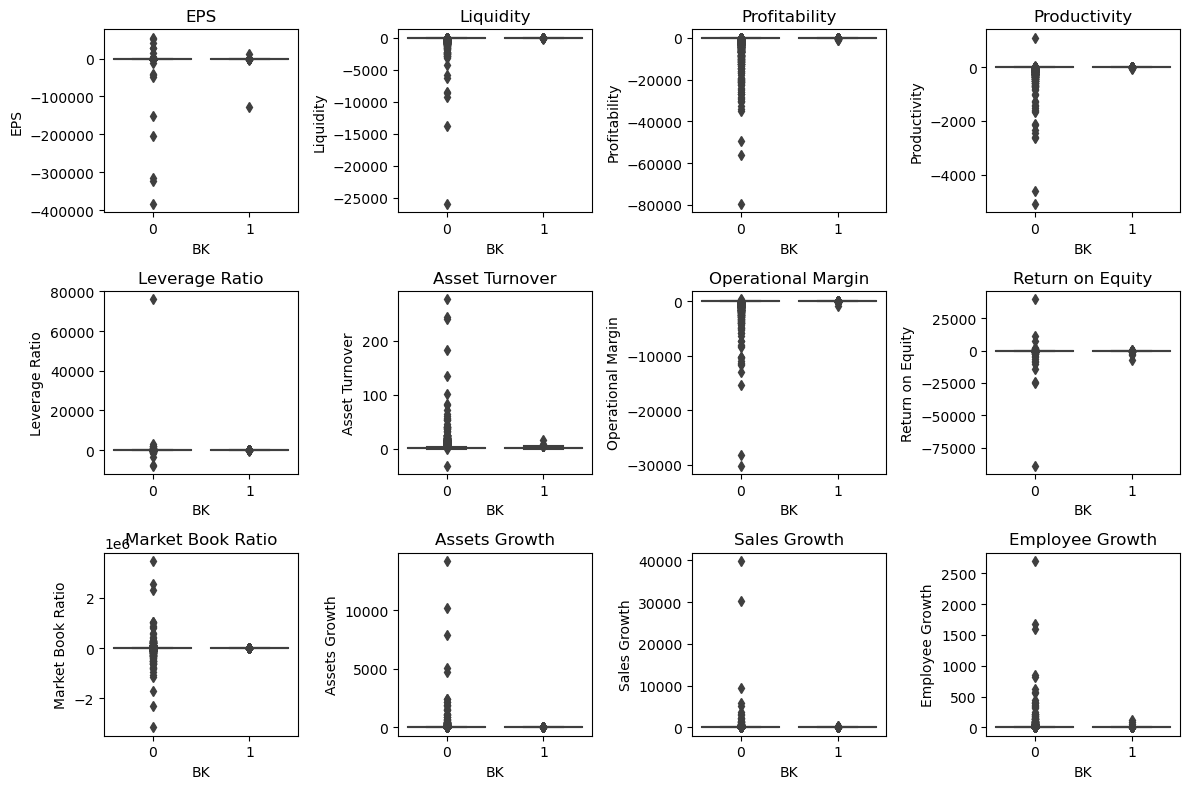

In [24]:
plt.figure(figsize=(12, 8))
for feature in column_names:
    plt.subplot(3, 4, column_names.index(feature) + 1)
    sns.boxplot(x='BK', y=feature, data=bankruptcy_df)
    plt.title(feature)
plt.tight_layout()
plt.show()

- Creating the box-and-whisker plots for each single feature.

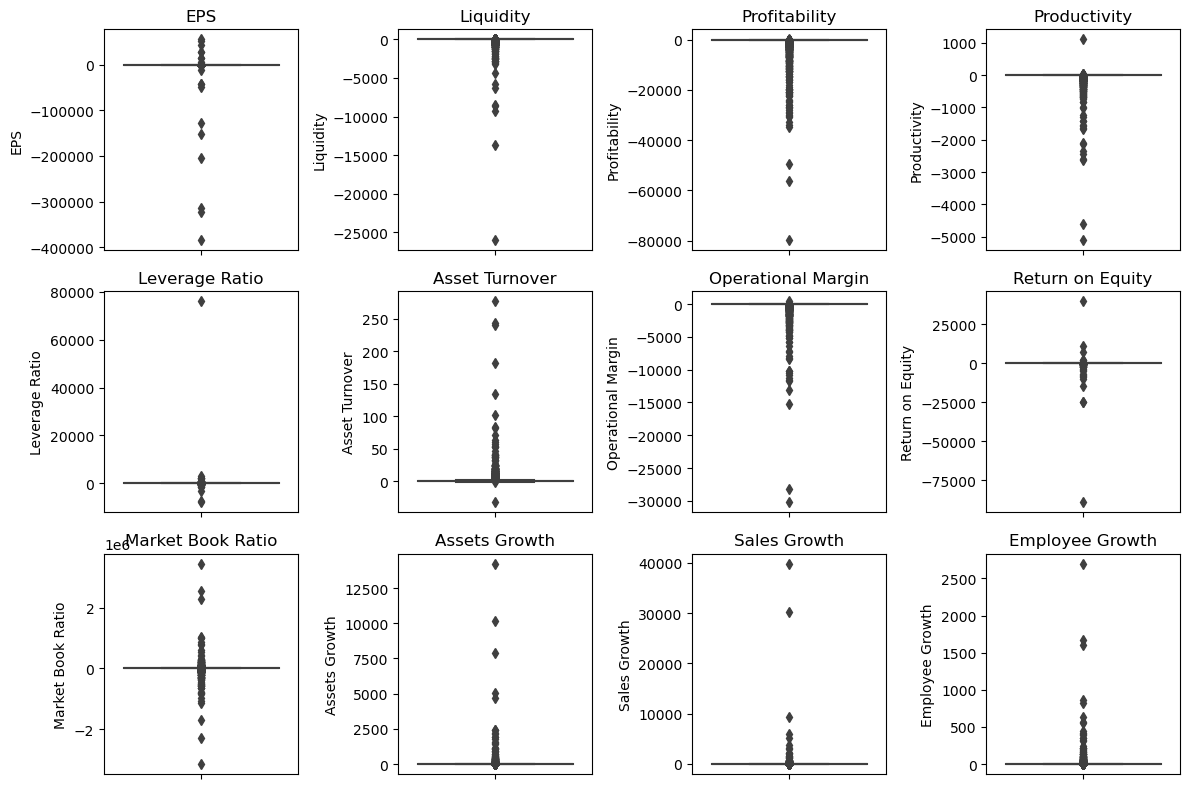

In [39]:
plt.figure(figsize=(12, 8))
for feature in column_names:
    plt.subplot(3, 4, column_names.index(feature) + 1)
    sns.boxplot(y=feature, data=bankruptcy_df)
    plt.title(feature)
plt.tight_layout()
plt.show()

<p>
c) Are there missing values?
</p>

In [40]:
print(bankruptcy_df.isnull().sum())

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64


<p>
As per the above output, there are missing values. Replacing missing values using the median method.
</p>

In [41]:
imputed_list = ['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio', 'Asset Turnover', 'Operational Margin', 'Return on Equity', 'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth','BK']
imputer = SimpleImputer(strategy='median')
imputed_bankruptcy_df = pd.DataFrame()
imputed_bankruptcy_df[imputed_list] = imputer.fit_transform(bankruptcy_df[imputed_list])

<p>
Checking again for missing values.
</p>

In [42]:
print(imputed_bankruptcy_df.isnull().sum())

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64


<p>
No missing values found after the raplacement with median method.
</p>

<p>
d) What is the correlation of the data?
</p>

In [43]:
imputed_bankruptcy_df.shape

(92872, 13)

<p>
e) Evaluating to either remove or keep the outliers with the Z-score method.
</p>

In [45]:
z_scores = np.abs((imputed_bankruptcy_df - imputed_bankruptcy_df.mean()) / imputed_bankruptcy_df.std())
threshold = 3
imputed_bankruptcy_df_Zscore = imputed_bankruptcy_df[(z_scores <= threshold).all(axis=1)]
print(imputed_bankruptcy_df_Zscore)

            EPS  Liquidity  Profitability  Productivity  Leverage Ratio  \
0      1.580000   0.360000       0.180000      0.130000        1.330000   
1      1.410000   0.360000       0.190000      0.120000        1.310000   
2      0.310000   0.320000       0.130000      0.080000        1.030000   
3      0.710000   0.280000       0.140000      0.080000        0.800000   
4      0.750000   0.410000       0.130000      0.080000        0.200000   
...         ...        ...            ...           ...             ...   
92865 -0.358336  -0.064598      -0.139986     -0.012580        1.548588   
92866 -1.468547  -0.013103      -0.565395     -0.245705        5.768961   
92868 -1.807630   0.093838      -1.204734     -0.121122       -4.530214   
92869 -0.015660   0.039260       0.000000     -0.082429        0.744907   
92870 -0.133054   0.053678      -0.029471      0.000998        0.574570   

       Asset Turnover  Operational Margin  Return on Equity  \
0            1.770000            0.0

In [46]:
imputed_bankruptcy_df_Zscore.shape

(91231, 13)

<p>
e) Checking the prediction variable distribution after remove outliers using Z-score technique.
</p>

In [49]:
print(imputed_bankruptcy_df_Zscore['BK'].value_counts())

0.0    91231
Name: BK, dtype: int64


In [50]:
proportions = [imputed_bankruptcy_df_Zscore['BK'].eq(0).sum(), imputed_bankruptcy_df_Zscore['BK'].eq(1).sum()]
tags = ['No Bankruptcy (0)', 'Bankruptcy (1)']

figpie = go.Figure(
    data=go.Pie(labels=tags, 
    values=proportions, hole=0.5)
)

figpie.update_layout(
    title='Proportion of Bankruptcy values in the dataset',
    height=450,
    width=900,
    margin=dict(l=50, r=50, t=50, b=50),
    template='seaborn',
    legend=dict(orientation='v', y=0.3, xanchor='left', x=1.0)
)

figpie.show()

<p>
- After using Z-score the values 1 of the target variable are removed, hence....
</p>

## Using original data

In [33]:
imputed_bankruptcy_df

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.051844,0.059733,0.017241,0.0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0.0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0.0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0.0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0.0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0.0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0.0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0.0


In [34]:
imputed_bankruptcy_df.shape

(92872, 13)

### 2. Developing the model

#### Splitting the data

    Split the input variables (X) and predictor variable (y)

In [53]:
X = imputed_bankruptcy_df.drop("BK", axis=1)
y = imputed_bankruptcy_df["BK"]

    Displaying the results

In [54]:
X

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.051844,0.059733,0.017241
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030
...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824


In [55]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
92867    0.0
92868    0.0
92869    0.0
92870    0.0
92871    1.0
Name: BK, Length: 92872, dtype: float64

    Splitting the dataset into training and testing sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    Creating instances for the models to work with

In [57]:
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()

In [58]:
# Apply SMOTE of training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [59]:
# Standarization of input variables
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

### Training and testing in Random Forest

In [62]:
random_forest_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

### Training and testing in Decision Tree

In [63]:
decision_tree_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

### Printing the results of the Random Forest model

In [70]:
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("Confusion Matrix:\n", confusion_rf)
print()

Accuracy: 0.9835800807537012
Precision: 0.12549019607843137
Recall: 0.2807017543859649
F1-score: 0.17344173441734417
Confusion Matrix:
 [[18238   223]
 [   82    32]]



### Printing the results of the Decision Tree model

In [71]:
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("Confusion Matrix:\n", confusion_dt)
print()

Accuracy: 0.9666756393001346
Precision: 0.06086956521739131
Recall: 0.30701754385964913
F1-score: 0.10159651669085633
Confusion Matrix:
 [[17921   540]
 [   79    35]]



### Optimizing hyperparameters using GridSearchCV - Random Forest

In [73]:
param_grid_rf = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
}

In [75]:
grid_search_random_forest_model = GridSearchCV(random_forest_model, param_grid_rf, scoring='accuracy', cv=5)
grid_search_random_forest_model.fit(X_train_resampled, y_train_resampled)
best_model_random_forest = grid_search_random_forest_model.best_estimator_

KeyboardInterrupt: 

In [ ]:
print("Tuned Hyperparameters Random Forest :", grid_search_random_forest_model.best_params_)
print("Best Model Random Forest :", best_model_random_forest)
print("Accuracy :", grid_search_random_forest_model.best_score_)

### Optimizing hyperparameters using GridSearchCV - Decistion Tree

In [76]:
param_grid_dt = {
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
}

In [77]:
grid_search_DecisionTree_model =  GridSearchCV(decision_tree_model, param_grid_dt, cv=5)
grid_search_DecisionTree_model.fit(X_train_resampled, y_train_resampled)
best_model_DecisionTree = grid_search_DecisionTree_model.best_estimator_

In [81]:
print("Tuned Hyperparameters Desicion tree :", grid_search_DecisionTree_model.best_params_)
print("Best Model Decision Tree :", best_model_DecisionTree)
print("Accuracy :", grid_search_DecisionTree_model.best_score_)

Tuned Hyperparameters Desicion tree : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Model Decision Tree : DecisionTreeClassifier()
Accuracy : 0.9746658902534346


### Summary of the models

- Random Forest

In [83]:
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("Confusion Matrix:\n", confusion_rf)
print()

Accuracy: 0.9835800807537012
Precision: 0.12549019607843137
Recall: 0.2807017543859649
F1-score: 0.17344173441734417
Confusion Matrix:
 [[18238   223]
 [   82    32]]



- Decision Tree

In [84]:
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print("Confusion Matrix:\n", confusion_dt)
print()
print("Accuracy after Hyperparameters:", grid_search_DecisionTree_model.best_score_)

Accuracy: 0.9666756393001346
Precision: 0.06086956521739131
Recall: 0.30701754385964913
F1-score: 0.10159651669085633
Confusion Matrix:
 [[17921   540]
 [   79    35]]

Accuracy after Hyperparameters: 0.9746658902534346


### Conclusions

### Recommendations